# FIRST EXPERIMENTATION - FIRST ASSUMPTION, WITHOUT LABELING CORRECTION

## Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [6]:
tweets_df.shape

(296, 2)

In [7]:
tweets_df.head()

,full_text,sentiment
0,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,neutral
1,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\nPorque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\nHay una desconfianza general en cuanto a las presidenciales.\nEstán provocando una respuesta violenta.,negative
2,@BOLIBAR2 @AndresPastrana_ @santiagoangelp Un poco tarde con las elecciones encima… mal para Colombia,negative
3,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive
4,"@BOLIBAR2 @CNE_COLOMBIA @AndresPastrana_ Aquí no va a pasar nada, y petro de va a robar las elecciones presidenciales y el país",negative


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.668919
neutral     0.270270
positive    0.060811
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(296, 2)

In [11]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_unlabeled_df.shape

(0, 2)

In [13]:
# Scenario 1: Working with all classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment']

### Splitting train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [15]:
X_train.shape

(236,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.669492
neutral     0.271186
positive    0.059322
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(60,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.666667
neutral     0.266667
positive    0.066667
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [25]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

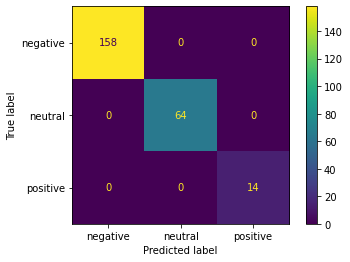

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

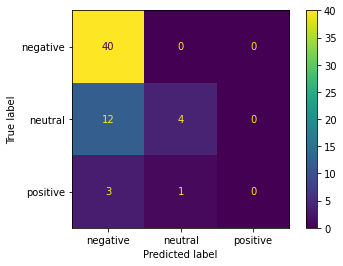

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.72727273 0.8        0.        ]
Recall: [1.   0.25 0.  ]
F1: [0.84210526 0.38095238 0.        ]


C:\Users\JCristancho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [31]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

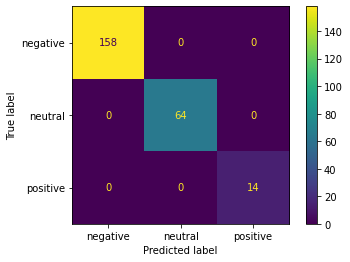

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

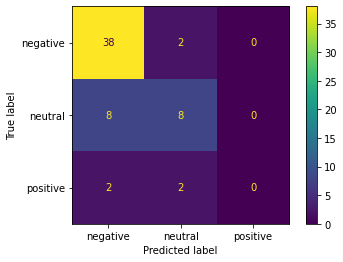

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [34]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.79166667 0.66666667 0.        ]
Recall: [0.95 0.5  0.  ]
F1: [0.86363636 0.57142857 0.        ]


C:\Users\JCristancho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

### Analyzing errors Bag of Words

In [35]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [36]:
error_df.shape

(60, 3)

In [37]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(20)

,full_text,actual,predicted
3,"2.925 jurados de votación estarían inhabilitados para estar en las elecciones presidenciales, ¿por qué? ⬇ https://t.co/QvDgqo11wV",neutral,negative
10,@JulianFMartinez @DNP_Colombia @aleboterob Estaban esperando el momento preciso. Las elecciones.,neutral,negative
17,"El candidato presidencial del Pacto Histórico retomó su actividad en tarimas, a pesar de las amenazas que denunció esta semana. Cúcuta y Valledupar son las ciudades en las que reanudó su agenda.\nhttps://t.co/kDmmaQuF1v",positive,negative
18,Las preguntas de #MatchPresidencial fueron diseñadas específicamente para el contexto político actual en Colombia de cara a las elecciones presidenciales en 2022.\n\n#Elecciones2022 #ColombiaDecide \n\nhttps://t.co/nmnB4UprVU,neutral,negative
19,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\n\nhttps://t.co/qRNy77hLm6,neutral,negative
23,Ya está disponible la entrevista que le hice a mi amigo Agustín Laje sobre las elecciones en Colombia. No se lo pierdan. \n@AgustinLaje\n https://t.co/FeuVfOt4bZ,neutral,negative
27,"#ElRiesgoEs perder la senda de crecimiento por la que va Colombia después de elecciones. El FMI, el Banco de la República y el Banco Mundial proyectan que nuestra economía sea una de las que más crezca en la región este año. Hay que cuidar la inversión y la productividad del pais",positive,negative
29,🇨🇴 Te presentamos las propuestas #TIC de los candidatos presidenciales en #Colombia 🌐👇\nhttps://t.co/C1jM1OxDRp,neutral,negative
34,@Abogado_JorgeEH @dica7810 @Jesus74502271 @FicoGutierrez ¿En qué país vive?¿Habla de las elecciones en Colombia?,neutral,negative
35,"https://t.co/KXwMVRujE7 recomendado, votemos a conciencia. Este app que saco @elespectador le ayuda a ver como sus posiciones se alinean con su candidato. 1/3 #eleccionescolombia2022 #elecciones #colombia",neutral,negative


### Analyzing errors TF-IDF

In [38]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_tfidf_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [39]:
error_df.shape

(60, 3)

In [40]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(20)

,full_text,actual,predicted
10,@JulianFMartinez @DNP_Colombia @aleboterob Estaban esperando el momento preciso. Las elecciones.,neutral,negative
17,"El candidato presidencial del Pacto Histórico retomó su actividad en tarimas, a pesar de las amenazas que denunció esta semana. Cúcuta y Valledupar son las ciudades en las que reanudó su agenda.\nhttps://t.co/kDmmaQuF1v",positive,negative
19,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\n\nhttps://t.co/qRNy77hLm6,neutral,negative
23,Ya está disponible la entrevista que le hice a mi amigo Agustín Laje sobre las elecciones en Colombia. No se lo pierdan. \n@AgustinLaje\n https://t.co/FeuVfOt4bZ,neutral,negative
27,"#ElRiesgoEs perder la senda de crecimiento por la que va Colombia después de elecciones. El FMI, el Banco de la República y el Banco Mundial proyectan que nuestra economía sea una de las que más crezca en la región este año. Hay que cuidar la inversión y la productividad del pais",positive,negative
28,En la era duque una era de violencia terrible su favoravilidad está en un 17% Q se reflejará este 29 de mayo creo que serán las elecciones más votadas de la historia de Colombia según lo que escucho votarán ❌ personas que jamás en su vida an votado y creo Q será por el cambio,negative,neutral
29,🇨🇴 Te presentamos las propuestas #TIC de los candidatos presidenciales en #Colombia 🌐👇\nhttps://t.co/C1jM1OxDRp,neutral,negative
34,@Abogado_JorgeEH @dica7810 @Jesus74502271 @FicoGutierrez ¿En qué país vive?¿Habla de las elecciones en Colombia?,neutral,negative
35,"https://t.co/KXwMVRujE7 recomendado, votemos a conciencia. Este app que saco @elespectador le ayuda a ver como sus posiciones se alinean con su candidato. 1/3 #eleccionescolombia2022 #elecciones #colombia",neutral,negative
36,"A pocos días de las elecciones presidenciales\nlas Autodefensas Gaitanistas de Colombia se declaran en Paro Armado hasta el 9 de mayo. El claro desinterés social del Gobierno actual, evidenciado en la permisión de hostigamiento contra los Colombianos.",negative,neutral
